C=1.00
Sparsity with L1 penalty:                4.69%
Sparsity with Elastic-Net penalty:       4.69%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.10
Sparsity with L1 penalty:                25.00%
Sparsity with Elastic-Net penalty:       14.06%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.90
Score with Elastic-Net penalty:          0.90
Score with L2 penalty:                   0.90
C=0.01
Sparsity with L1 penalty:                84.38%
Sparsity with Elastic-Net penalty:       68.75%
Sparsity with L2 penalty:                4.69%
Score with L1 penalty:                   0.86
Score with Elastic-Net penalty:          0.88
Score with L2 penalty:                   0.89


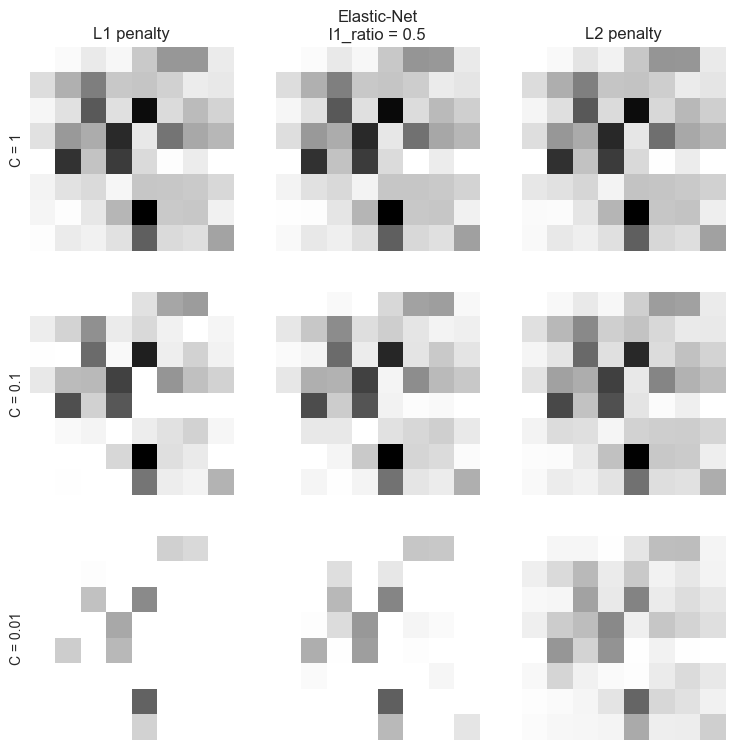

In [4]:
# 导入操作系统库
import os
# 更改工作目录
os.chdir(r"D:\softwares\applied statistics\pythoncodelearning\chap1\sourcecode")
# 导入基础计算库
import numpy as np
# 导入绘图库
import matplotlib.pyplot as plt
# 导入logistic回归模型
from sklearn.linear_model import LogisticRegression
# 导入数据集
from sklearn.datasets import load_digits
# 导入标准化工具
from sklearn.preprocessing import StandardScaler
# 导入绘图库中的字体管理包
from matplotlib import font_manager
# 实现中文字符正常显示
font = font_manager.FontProperties(fname=r"C:\Windows\Fonts\SimKai.ttf")
# 使用seaborn风格绘图
plt.style.use("seaborn-v0_8")
# 生成数据及
X, y = load_digits(return_X_y=True)
# 标准化
X = StandardScaler().fit_transform(X)
# 取大于4的类别作为标签
y = (y > 4).astype(int)
# 弹性网的比例
l1_ratio = 0.5
# 开始绘图
fig, axes = plt.subplots(3, 3, figsize=(9,9))
for i, (C, axes_row) in enumerate(zip((1, 0.1, 0.01), axes)):
    # Increase tolerance for short training time
    clf_l1_LR = LogisticRegression(
        C=C, 
        penalty="l1", 
        tol=0.01, 
        solver="saga"
    )
    clf_l2_LR = LogisticRegression(
        C=C, 
        penalty="l2", 
        tol=0.01, solver="saga"
    )
    clf_en_LR = LogisticRegression(
        C=C, 
        penalty="elasticnet", 
        solver="saga", 
        l1_ratio=l1_ratio, 
        tol=0.01
    )
    # 模型拟合
    clf_l1_LR.fit(X, y)
    clf_l2_LR.fit(X, y)
    clf_en_LR.fit(X, y)
    # 提取模型的系数
    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    coef_en_LR = clf_en_LR.coef_.ravel()
    # 系数的稀疏程度，以含有零的比例
    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100
    sparsity_en_LR = np.mean(coef_en_LR == 0) * 100
    print("C=%.2f" % C)
    print(
        "{:<40} {:.2f}%".format(
            "Sparsity with L1 penalty:", 
            sparsity_l1_LR
        )
    )
    print(
        "{:<40} {:.2f}%".format(
            "Sparsity with Elastic-Net penalty:", 
            sparsity_en_LR
        )
    )
    print(
        "{:<40} {:.2f}%".format(
            "Sparsity with L2 penalty:", 
            sparsity_l2_LR
        )
    )
    print(
        "{:<40} {:.2f}".format(
            "Score with L1 penalty:", 
            clf_l1_LR.score(X, y) # 分类准确率
        )
    )
    print(
        "{:<40} {:.2f}".format(
            "Score with Elastic-Net penalty:", 
            clf_en_LR.score(X, y)
        )
    )
    print(
        "{:<40} {:.2f}".format(
            "Score with L2 penalty:", 
            clf_l2_LR.score(X, y)
        )
    )

    if i == 0:
        axes_row[0].set_title("L1 penalty")
        axes_row[1].set_title("Elastic-Net\nl1_ratio = %s" % l1_ratio)
        axes_row[2].set_title("L2 penalty")

    for ax, coefs in zip(axes_row, [coef_l1_LR, coef_en_LR, coef_l2_LR]):
        ax.imshow(
            np.abs(coefs.reshape(8, 8)),
            interpolation="nearest",
            cmap="binary",
            vmax=1,
            vmin=0,
        )
        ax.set_xticks(())
        ax.set_yticks(())

    axes_row[0].set_ylabel("C = %s" % C)

plt.show()
fig.savefig("../codeimage/code24.pdf")
